<a href="https://colab.research.google.com/github/Vukasin00/IT-26-2019-Vukasin-Stanisic/blob/master/Vukasin_Stanisic_IT26_2019_PPPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student: Vukašin Stanišić IT26/2019**

**Tema: Generative Adversarial Networks - GAN**

**Predmet: Principi prezentacije i prepoznavanja oblika**

Uvod
Generative Adversarial Network (GAN) je vrsta veštačke neuronske mreže koja se koristi za generisanje novih podataka, poput slika, zvukova ili teksta. Ova mreža se sastoji iz dva glavna dela: generatora i diskriminatora, koji se međusobno nadmeću kako bi postigli bolje rezultate.

1. **Generator**: Generator ima zadatak da stvori nove podatke. Na primer, ako govorimo o generisanju slika, generator stvara slike koje bi trebalo da izgledaju kao prave, iako su zapravo potpuno veštački generisane. Generator počinje sa nasumičnim šumom i postepeno ga transformiše u podatke koji sve više liče na stvarne.

2. **Diskriminator**: Diskriminator je kao "detektor laži". On dobija prave podatke (na primer, prave slike) i podatke koje je generisao generator. Diskriminator se uči kako da razlikuje prave podatke od onih koje je generisao generator. Cilj mu je da što bolje prepozna razliku između ta dva tipa podataka.

Proces rada GAN-a se odvija kroz iteracije, gde generator i diskriminator kontinuirano poboljšavaju svoje sposobnosti. Generator postaje sve bolji u stvaranju verodostojnih podataka, dok diskriminator postaje sve bolji u razlikovanju pravih podataka od lažnih.

Sama bit "adversarialnog" (nadmetanja) u GAN-u proizlazi iz činjenice da su generator i diskriminator u suštini u konkurenciji. Generator se trudi da stvori što bolje podatke kako bi "prevario" diskriminatora da pomisli da su generisani podaci stvarni. Sa druge strane, diskriminator se trudi da što tačnije razlikuje prave podatke od generisanih i tako "nauči" generatora da generiše autentičnije podatke.

Kroz ovu igru nadmetanja, GAN postiže sve bolje rezultate u generisanju realističnih podataka, bilo da je reč o slikama ljudi, zgrada, mačaka, ili čemu god da je naučen da generiše. GAN-i su se pokazali veoma korisnim u umetničkim kreacijama, obradi slika, generisanju teksta i mnogim drugim aplikacijama.

Generative Adversarial Network (GAN) je sofisticirana duboka neuronska mreža koja se sastoji iz dva ključna elementa: generatora i diskriminatora, koji su u stalnoj igri nadmetanja kako bi postigli sve bolje rezultate u generisanju uverljivih podataka.

Proces funkcionisanja GAN-a:

Korak 1 - Inicijalizacija i obuka:

Generator uzima slučajni signal buke kao ulaz i koristi ga da generiše slike, koje se potom koriste za obuku diskriminatora.
Diskriminator prima stvarne slike i slike generisane od strane generatora. Njegova uloga je da oceni verovatnoću da li je dana slika stvarna ili generisana.
Na početku, diskriminator daje relativno visoke verovatnoće za obe vrste slika, jer je u početnoj fazi treninga. Greška se računa poređenjem procenjenih vrednosti sa stvarnim vrednostima i ta greška se propagira unazad kroz diskriminator radi ažuriranja težina.
Korak 2 - Poboljšanje generatora:

Uzimamo niz slika koje je generator prethodno stvorio i dovodimo ih ponovo kroz diskriminator, ali ovog puta ne dajući diskriminatoru informacije o stvarnim slikama.
Generator pokušava da poboljša svoje performanse tako što "vara" diskriminatora da veruje da su njegove generisane slike stvarne. To postiže tako što prilagođava svoj izlaz kako bi minimizirao grešku diskriminatora.
Diskriminator sada izdaje izlazne verovatnoće za generisane slike. Greška se ponovo računa i propagira unazad kroz generator radi ažuriranja težina.
Korak 3 - Postizanje ravnoteže:

Proces iteracija se nastavlja, i generator i diskriminator postaju sve veštiji u svom zadatku.
Cilj je dostići tačku u kojoj su generisane slike toliko uverljive da čak ni diskriminator ne može pouzdano razlikovati stvarne slike od generisanih.
Primena GAN-a:

Generisanje slika: GAN može stvoriti realistične slike ljudi, životinja ili objekata.
Modifikacija slika: Može transformisati postojeće slike u nešto novo.
Super rezolucija: Povećava rezoluciju slika.
Umetnička podrška: Pomaže umetnicima u stvaranju novih dela.
Generisanje govora: GAN može generisati ljudski govor sa određenim osobinama.
Starenje lica: Može vizualizovati kako će nečije lice izgledati tokom godina.
Sveukupno, GAN predstavlja inovativan pristup generisanju autentičnih podataka, čime otvara mnoge mogućnosti u oblastima umetnosti, obrade slika i drugim kreativnim i tehničkim domenima.

GAN SLIKA
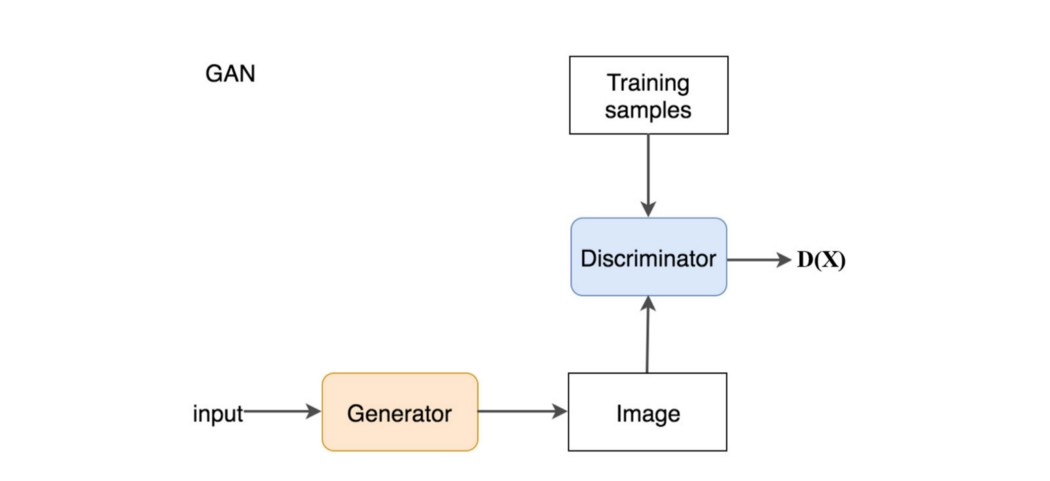

Set podataka
Ova naredba se koristi za preuzimanje datoteke koje nazivam podaci.zip sa Google Drive-a. Koristi se tehnika za automatsko preuzimanje koristeći kolačiće i potvrdu preuzimanja kako bi se izbeglo ručno interagovanje sa stranicom preuzimanja.